In [16]:
from Classes.LoadModel import BaseModel
from Classes.Predict import Prediction
from Classes.Summarize import *
from Classes.Multiclass_model import *
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Layer, Input, Dropout, Activation, Convolution2D, MaxPooling2D
import tensorflow as tf
from tensorflow.keras.layers import (Dense, Conv2D, MaxPool2D, Dropout, Flatten, LeakyReLU, BatchNormalization)
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input_VGG16

In [2]:
# Start images processing and dataframe splitting
Multi = Multiclass_Model(IND_FILE)
trainer = Train(IND_FILE, IMAGE_PATH)

In [3]:
data = pd.read_csv('/home/ubuntu/jonathan/files_list.csv')
data.head()

Unnamed: 0     5_o_Clock_Shadow      Arched_Eyebrows           Attractive  \
0           0  face_att_000007.jpg  face_att_000001.jpg  face_att_000001.jpg   
1           1  face_att_000008.jpg  face_att_000005.jpg  face_att_000004.jpg   
2           2  face_att_000015.jpg  face_att_000006.jpg  face_att_000005.jpg   
3           3  face_att_000016.jpg  face_att_000008.jpg  face_att_000006.jpg   
4           4  face_att_000023.jpg  face_att_000009.jpg  face_att_000007.jpg   

       Bags_Under_Eyes                 Bald                Bangs  \
0  face_att_000002.jpg  face_att_000051.jpg  face_att_000009.jpg   
1  face_att_000007.jpg  face_att_000079.jpg  face_att_000029.jpg   
2  face_att_000008.jpg  face_att_000115.jpg  face_att_000046.jpg   
3  face_att_000012.jpg  face_att_000125.jpg  face_att_000048.jpg   
4  face_att_000015.jpg  face_att_000134.jpg  face_att_000053.jpg   

              Big_Lips             Big_Nose           Black_Hair  \
0  face_att_000003.jpg  face_att_000002.jpg  face_att_000007.jpg   
1  face_att_000005.jpg  face_att_000007.jpg  face_att_000008.jpg   
2  face_att_000006.jpg  face_att_000014.jpg  face_att_000011.jpg   
3  face_att_000007.jpg  face_att_000015.jpg  face_att_000012.jpg   
4  face_att_000008.jpg  face_att_000018.jpg  face_att_000014.jpg   

            Blond_Hair               Blurry           Brown_Hair  \
0  face_att_000013.jpg  face_att_000003.jpg  face_att_000001.jpg   
1  face_att_000018.jpg  face_att_000049.jpg  face_att_000002.jpg   
2  face_att_000019.jpg  face_att_000070.jpg  face_att_000006.jpg   
3  face_att_000022.jpg  face_att_000084.jpg  face_att_000023.jpg   
4  face_att_000024.jpg  face_att_000096.jpg  face_att_000028.jpg   

        Bushy_Eyebrows               Chubby          Double_Chin  \
0  face_att_000007.jpg  face_att_000020.jpg  face_att_000047.jpg   
1  face_att_000012.jpg  face_att_000031.jpg  face_att_000051.jpg   
2  face_att_000014.jpg  face_att_000037.jpg  face_att_000052.jpg   
3  face_att_000037.jpg  face_att_000051.jpg  face_att_000060.jpg   
4  face_att_000044.jpg  face_att_000060.jpg  face_att_000072.jpg   

            Eyeglasses               Goatee            Gray_Hair  \
0  face_att_000053.jpg  face_att_000020.jpg  face_att_000021.jpg   
1  face_att_000093.jpg  face_att_000060.jpg  face_att_000051.jpg   
2  face_att_000119.jpg  face_att_000109.jpg  face_att_000094.jpg   
3  face_att_000144.jpg  face_att_000123.jpg  face_att_000125.jpg   
4  face_att_000152.jpg  face_att_000136.jpg  face_att_000127.jpg   

          Heavy_Makeup      High_Cheekbones                 Male  \
0  face_att_000001.jpg  face_att_000001.jpg  face_att_000003.jpg   
1  face_att_000005.jpg  face_att_000002.jpg  face_att_000007.jpg   
2  face_att_000006.jpg  face_att_000009.jpg  face_att_000008.jpg   
3  face_att_000009.jpg  face_att_000010.jpg  face_att_000012.jpg   
4  face_att_000010.jpg  face_att_000012.jpg  face_att_000013.jpg   

   Mouth_Slightly_Open             Mustache          Narrow_Eyes  \
0  face_att_000001.jpg  face_att_000109.jpg  face_att_000003.jpg   
1  face_att_000002.jpg  face_att_000209.jpg  face_att_000005.jpg   
2  face_att_000006.jpg  face_att_000245.jpg  face_att_000015.jpg   
3  face_att_000009.jpg  face_att_000250.jpg  face_att_000018.jpg   
4  face_att_000011.jpg  face_att_000284.jpg  face_att_000020.jpg   

              No_Beard            Oval_Face            Pale_Skin  \
0  face_att_000001.jpg  face_att_000009.jpg  face_att_000019.jpg   
1  face_att_000002.jpg  face_att_000012.jpg  face_att_000048.jpg   
2  face_att_000003.jpg  face_att_000013.jpg  face_att_000089.jpg   
3  face_att_000004.jpg  face_att_000017.jpg  face_att_000104.jpg   
4  face_att_000005.jpg  face_att_000019.jpg  face_att_000122.jpg   

           Pointy_Nose    Receding_Hairline          Rosy_Cheeks  \
0  face_att_000001.jpg  face_att_000025.jpg  face_att_000009.jpg   
1  face_att_000003.jpg  face_att_000031.jpg  face_att_000018.jpg   
2  face_att_000004.jpg  face_att_000049.jpg  f

In [4]:
print('Reading File...')
print(f'Preparing data.. \nCreating Train, Test...')

label_list = ['Brown_Hair','Blond_Hair', 'Black_Hair','Bald', 'Gray_Hair']
train, test = Multi.create_dataframe_multi(label_list, 4500)
print('Done!')

Reading File...
Preparing data.. 
Creating Train, Test...
Assertions Passed! Sets  Are of image files W/O Duplication
Done!


In [5]:
# Split Train, Validation and Test Sets
print(f'\nRunning data generator...')
model_name = 'vgg16'
train_data, valid_data, test_data = Multi.generator_splitter_multi(model_name, train, test, IMAGE_PATH, preprocessing=preprocess_input_VGG16)


Running data generator...
Found 13804 validated image filenames belonging to 5 classes.
Found 3450 validated image filenames belonging to 5 classes.
Found 4494 validated image filenames.


In [6]:
print(f'\n\nLoading Model...')
print('Pick a Model: vgg19, MobileNetV2, vggface, facenet, emotion, age, gender, race')
label_name = 'Hair_color_2'
model_file = os.path.join('Weights/', model_name + '_' + label_name + '.h5')
json_path = os.path.join('json/', model_name + '_' + label_name + '.json')
epoch = 100



Loading Model...
Pick a Model: vgg19, MobileNetV2, vggface, facenet, emotion, age, gender, race


In [7]:
base_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

for layer in base_model.layers:
     layer.trainable = False
     
# Build the classification layers on top of the base VGG16 base layers for the dataset
model = tf.keras.Sequential(base_model.layers)

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(5, activation = 'softmax'))

# model.compile(optimizer=tf.keras.optimizers.Adam(), 
#               loss='categorical_crossentropy', 
#               metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [8]:
history, model = trainer.start_train(model, model_file, train_data, valid_data, epoch, multi=True,
                                     callback=None,
                                     optimize=None)
print('Loading best weights...')
model.load_weights(model_file)
print('Done!')

# Saving History
with open(json_path, 'w') as f:
    json.dump(history.history, f)
history = json.load(open(json_path))

Epoch 1/100
215/215 [==============================] - ETA: 0s - loss: 1.2569 - accuracy: 0.5356
Epoch 00001: val_loss improved from inf to 0.69108, saving model to Weights/vgg16_Hair_color_2.h5
215/215 [==============================] - 89s 413ms/step - loss: 1.2569 - accuracy: 0.5356 - val_loss: 0.6911 - val_accuracy: 0.7379
Epoch 2/100
215/215 [==============================] - ETA: 0s - loss: 0.7903 - accuracy: 0.7007
Epoch 00002: val_loss improved from 0.69108 to 0.60608, saving model to Weights/vgg16_Hair_color_2.h5
215/215 [==============================] - 87s 403ms/step - loss: 0.7903 - accuracy: 0.7007 - val_loss: 0.6061 - val_accuracy: 0.7733
Epoch 3/100
215/215 [==============================] - ETA: 0s - loss: 0.6302 - accuracy: 0.7623
Epoch 00003: val_loss improved from 0.60608 to 0.56930, saving model to Weights/vgg16_Hair_color_2.h5
215/215 [==============================] - 87s 406ms/step - loss: 0.6302 - accuracy: 0.7623 - val_loss: 0.5693 - val_accuracy: 0.7913
Epoch

In [9]:
# Evaluate the network on valid data
Prediction.evaluate_model(model, valid_data)

Evaluating the network ...
54/54 [==============================] - 20s 369ms/step - loss: 0.5600 - accuracy: 0.8029
Validation Loss:	0.56
Validation Acc.:	0.803


In [10]:
labels = (train_data.class_indices)
labels

{'Bald': 0, 'Black_Hair': 1, 'Blond_Hair': 2, 'Brown_Hair': 3, 'Gray_Hair': 4}

In [11]:
# Predict on test data
y_pred = Prediction.test_prediction(model, test_data, train_data)

Starting prediction...
Done!


Confusion Matrix ...
     0    1    2    3    4
0  764   12    2    4  117
1   18  686    3  175    8
2    1    3  728  110   55
3    3   97   80  684   34
4  175   17   48   32  624


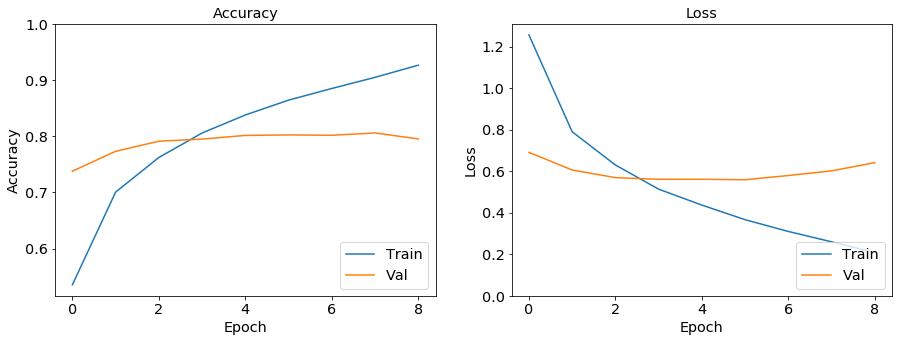

Classification Report ...
{'Bald': {'precision': 0.7950052029136316, 'recall': 0.8498331479421579, 'f1-score': 0.821505376344086, 'support': 899}, 'Black_Hair': {'precision': 0.841717791411043, 'recall': 0.7707865168539326, 'f1-score': 0.804692082111437, 'support': 890}, 'Blond_Hair': {'precision': 0.8455284552845529, 'recall': 0.8115942028985508, 'f1-score': 0.8282138794084186, 'support': 897}, 'Brown_Hair': {'precision': 0.6805970149253732, 'recall': 0.7616926503340757, 'f1-score': 0.7188649500788229, 'support': 898}, 'Gray_Hair': {'precision': 0.7446300715990454, 'recall': 0.6964285714285714, 'f1-score': 0.7197231833910034, 'support': 896}, 'accuracy': 0.778125, 'macro avg': {'precision': 0.7814957072267291, 'recall': 0.7780670178914576, 'f1-score': 0.7785998942667536, 'support': 4480}, 'weighted avg': {'precision': 0.781393348152044, 'recall': 0.778125, 'f1-score': 0.7785780878863807, 'support': 4480}}


In [12]:
# plot
top = min(len(test['label']), len(y_pred))
metrics = Metrics(history, epoch, test['label'][:top].tolist(), y_pred[:top], model_name, label_name)
metrics.confusion_matrix()
metrics.acc_loss_graph()
metrics.classification_report()

In [13]:
test

files       label
3944  face_att_019332.jpg  Brown_Hair
4124  face_att_097295.jpg   Gray_Hair
3949  face_att_019347.jpg  Brown_Hair
3994  face_att_016587.jpg  Black_Hair
4306  face_att_190778.jpg        Bald
4152  face_att_020465.jpg  Brown_Hair
3846  face_att_015867.jpg  Black_Hair
4272  face_att_099986.jpg   Gray_Hair
4400  face_att_029978.jpg  Blond_Hair
3673  face_att_015154.jpg  Black_Hair
4275  face_att_029070.jpg  Blond_Hair
4405  face_att_018185.jpg  Black_Hair
3788  face_att_018506.jpg  Brown_Hair
4179  face_att_020574.jpg  Brown_Hair
3852  face_att_091132.jpg   Gray_Hair
3724  face_att_015357.jpg  Black_Hair
4411  face_att_196349.jpg        Bald
4414  face_att_021823.jpg  Brown_Hair
3688  face_att_024817.jpg  Blond_Hair
3873  face_att_015989.jpg  Black_Hair
4095  face_att_096681.jpg   Gray_Hair
3937  face_att_019312.jpg  Brown_Hair
4234  face_att_028818.jpg  Blond_Hair
4499  face_att_022207.jpg  Brown_Hair
3709  face_att_025043.jpg  Blond_Hair
4469  face_att_030489.jpg  Blond_Hair
3858  face_att_091266.jpg   Gray_Hair
4100  face_att_027780.jpg  Blond_Hair
4091  face_att_027719.jpg  Blond_Hair
4152  face_att_097754.jpg   Gray_Hair
...                   ...         ...
3985  face_att_175315.jpg        Bald
4358  face_att_102673.jpg   Gray_Hair
4357  face_att_029658.jpg  Blond_Hair
4106  face_att_181603.jpg        Bald
4021  face_att_019758.jpg  Brown_Hair
4427  face_att_197481.jpg        Bald
3924  face_att_016230.jpg  Black_Hair
3863  face_att_091315.jpg   Gray_Hair
4127  face_att_017115.jpg  Black_Hair
3745  face_att_088762.jpg   Gray_Hair
4480  face_att_018483.jpg  Black_Hair
3889  face_att_091930.jpg   Gray_Hair
3659  face_att_086913.jpg   Gray_Hair
4013  face_att_019705.jpg  Brown_Hair
4426  face_att_018287.jpg  Black_Hair
3620  face_att_024320.jpg  Blond_Hair
3790  face_att_015594.jpg  Black_Hair
3791  face_att_166789.jpg        Bald
4421  face_att_018258.jpg  Black_Hair
3727  face_att_025148.jpg  Blond_Hair
4374  face_att_103220.jpg   Gray_Hair
4486  face_att_105549.jpg   Gray_Hair
3815  face_att_025751.jpg  Blond_Hair
3739  face_att_018238.jpg  Brown_Hair
4305  face_att_021296.jpg  Brown_Hair
3623  face_att_014979.jpg  Black_Hair
4473  face_att_105300.jpg   Gray_Hair
3765  face_att_025371.jpg  Blond_Hair
3925  face_att_016236.jpg  Black_Hair
3698  face_att_087769.jpg   Gray_Hair

[4494 rows x 2 columns]

In [19]:
def predict_label_multi(model, labels, imagepath, preprocess=None):
    img = tf.keras.preprocessing.image.load_img(os.path.join(imagepath), target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, 0)  # Create batch axis
    
    if preprocess =='vgg16':
        img_array = preprocess_input_VGG16(img_array)
    elif preprocess =='vgg19':
        img_array = preprocess_input_VGG19(img_array)
    elif preprocess =='MobileNetV2':
        img_array = preprocess_input_MNV2(img_array)
    predictions = model.predict(img_array)
    score = np.argmax(predictions, axis=1)
    imge = mpimg.imread(imagepath)
    plt.figure(figsize=(5, 5))
    plt.imshow(imge)
    plt.title(list(labels.keys())[int(score)])
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [24]:
labels_hair = {'Bald': 0, 'Black_Hair': 1, 'Blond_Hair': 2, 'Brown_Hair': 3, 'Gray_Hair': 4}
predict_label_multi(model, labels_hair, '/home/ubuntu/sheryl/face_att_sheryl/face_att_024320.jpg', preprocess='vgg16')